# Project Title
**Launch Intelligence: Predicting SpaceX Mission Outcomes Using Data Science**

In [2]:
#Data Collection via SpaceX REST API
import requests
import pandas as pd

url = "https://api.spacexdata.com/v4/launches"
response = requests.get(url)
data = response.json()

df = pd.json_normalize(data)
df.to_csv('spacex_launch_data.csv', index=False)  # Optional: save data locally


In [3]:
#Data Wrangling & Preprocessing
df['date_utc'] = pd.to_datetime(df['date_utc'], errors='coerce')
df['success_clean'] = df['success'].apply(lambda x: 'Success' if x is True else ('Failure' if x is False else 'Unknown'))
df['num_payloads'] = df['payloads'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['year'] = df['date_utc'].dt.year


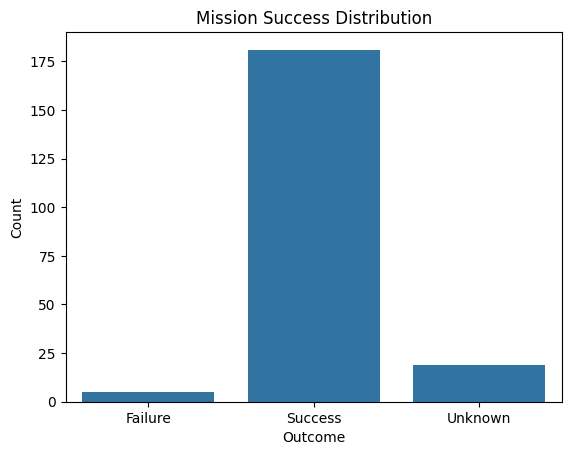

In [6]:
#Exploratory Data Analysis & Visualizationabs
#Launch success distribution:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='success_clean', data=df)
plt.title("Mission Success Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()


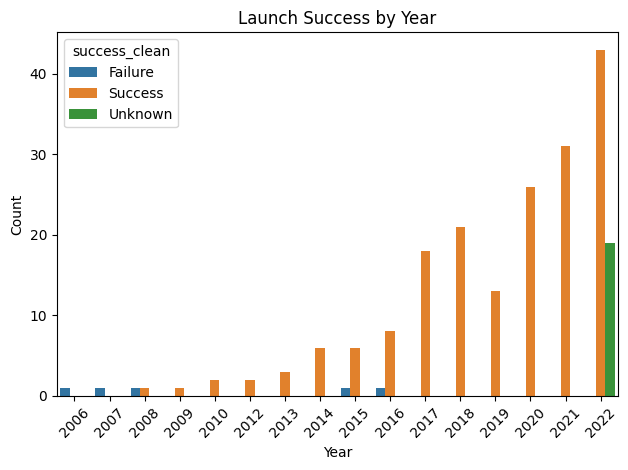

In [7]:
#Launch count by year:
sns.countplot(x='year', hue='success_clean', data=df[df['year'].notnull()])
plt.title("Launch Success by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
#Predictive Modeling Workflowabs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

features = pd.get_dummies(df[['launchpad', 'rocket']], drop_first=True)
y = df['success'].apply(lambda x: 1 if x is True else 0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [9]:
#Model Evaluationabs

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9024390243902439

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.90      1.00      0.95        37

    accuracy                           0.90        41
   macro avg       0.45      0.50      0.47        41
weighted avg       0.81      0.90      0.86        41


Confusion Matrix:
 [[ 0  4]
 [ 0 37]]


C:\Users\A\ANACONDA3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\A\ANACONDA3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\A\ANACONDA3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


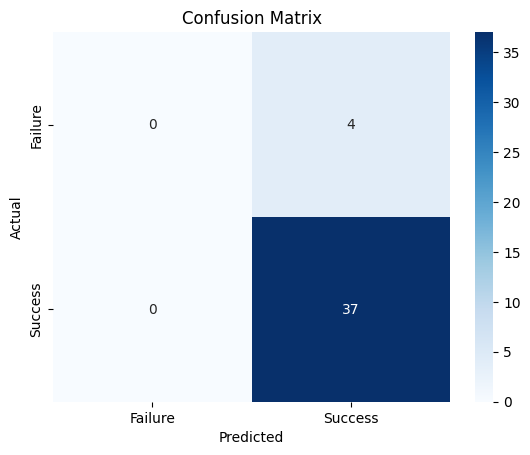

In [10]:
#Confusion Matrix Plot:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Failure', 'Success'], yticklabels=['Failure', 'Success'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [12]:
!pip install folium

   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/113.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/113.4 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/113.4 kB 262.6 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/113.4 kB 365.7 kB/s eta 0:00:01
   -------------------------------------- 113.4/113.4 kB 551.6 kB/s eta 0:00:00


In [13]:
#Folium Launch Map Exampleabs

import folium

launch_map = folium.Map(location=[28.562302, -80.577356], zoom_start=5)  # Kennedy Space Center coords

folium.Marker([28.562302, -80.577356], tooltip="KSC LC-39A", popup="Kennedy Space Center LC-39A").add_to(launch_map)
launch_map.save('launch_map.html')
